<a href="https://colab.research.google.com/github/Shayankr/AI_and_ComputerVision/blob/master/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image augmentation** is a technique that is used to artificially expand the data-set. 

This is helpful when we are given a data-set with very few data samples. In case of Deep Learning, this situation is bad as the model tends to over-fit when we train it on limited number of data samples.

Kaggle Dataset link: https://www.kaggle.com/competitions/dogs-vs-cats

My previous github repo link: https://github.com/Shayankr/AI_and_ComputerVision/blob/master/Image_Data_Generator(Kaggle_Dogs_vs_Cats).ipynb

In [59]:
# Check nvidia Graphics
!nvidia-smi

Wed Oct  5 09:11:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
# Import some necessary Libraries/Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil

In [2]:
# Import Tensorflow and Keras
import tensorflow as tf
from tensorflow import keras

In [3]:
# If you need to import already available datatset in keras, you can do by--
from tensorflow.keras.datasets import mnist # mnist dataset
from tensorflow.keras.datasets import fashion_mnist # Fashion_mnist dataset

In [4]:
# But, here I will work on aggle datatset-- Dogs vs. Cats
# https://www.kaggle.com/competitions/dogs-vs-cats

Kaggle Dataset link: https://www.kaggle.com/competitions/dogs-vs-cats/data

My previous github repo link: https://github.com/Shayankr/AI_and_ComputerVision/blob/master/Image_Data_Generator(Kaggle_Dogs_vs_Cats).ipynb

In [5]:
#import dataset from kaggle

In [6]:
# At first upload "kaggle.json" file in colab file-folder to use the API Key Access Token. then import "kaggle" here.

In [7]:
# make directory
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/  #copy kaggle.json in kaggle directory.

In [8]:
# Now import kaggle
import kaggle

In [9]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
# Now unzip this
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sampleSubmission.csv    
replace test1.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test1.zip               
replace train.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.zip               y



In [12]:
# At  this time, I have only the need of "train.zip", so unzip it.
!unzip -u -q train.zip

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  match filenames case-insensitively     -L  make (some) names lowercase
  -X  restore UID/GID info                   -V  retain VMS version numbers
  -K  keep setuid/setgid/tacky permissions   -M  pipe through "more" pager
  -O CHARSET  specify a character encoding for DOS, Windows and OS/2 archives
  -I CHARSET  specify a character encoding for UNIX and other archives

See "unzip -hh" or unzip.txt for more help.  Examples:
  unzip data1 -x joe   => extract all files except joe from zipfile data1.zip
  unzip -p foo | more  => send contents of foo.zip via pipe into program more
  unzip -fo foo ReadMe => quietly replace existing ReadMe if archive file newer

In [13]:
len(os.listdir("train"))   #25000 images in training dataset.

25000

In [14]:
#len(!ls "train") --- invalid syntax

In [15]:
!ls

dogs-vs-cats.zip  sample_data		test1.zip  train_1
kaggle.json	  sampleSubmission.csv	train	   train.zip


In [16]:
import cv2

In [17]:
# Check one image to show it
image = cv2.imread("train/cat.0.jpg")
print(f"Shape of 1st cat image is: {image.shape}")

Shape of 1st cat image is: (374, 500, 3)


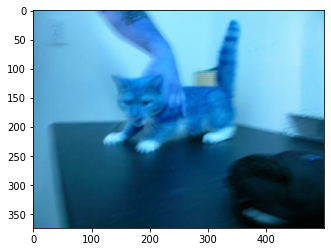

In [18]:
#Show image
plt.imshow(image)

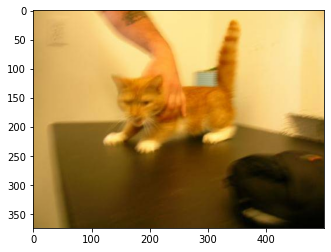

In [19]:
# Correcting the color channels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
# Now, Use PIL
from PIL import Image

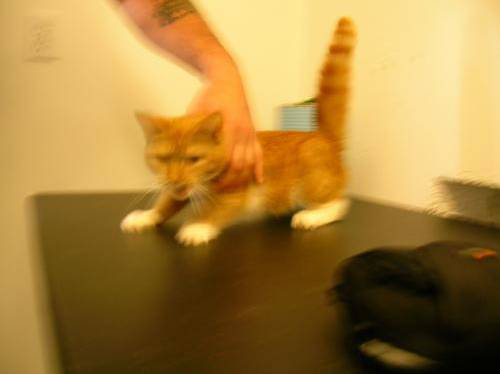

In [21]:
Image.open("train/cat.0.jpg")

In [22]:
# Let;s see the shape of 1st few images of cat
image_shape=[]
for i in range(6):
  image = cv2.imread(f"train/cat.{i}.jpg")
  image_shape.append(image.shape)
image_shape

[(374, 500, 3),
 (280, 300, 3),
 (396, 312, 3),
 (414, 500, 3),
 (375, 499, 3),
 (144, 175, 3)]

In [23]:
# From above it is clear that all images have not same size(shape).

## Image Data Generator with Image Augmentation

In [24]:
# Image Data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
# MAke a sepearate train folder--- inside it make 2 seperate folders -- 1 for cat and 1 or dog.
# Insert all cat images inside "cat" folder.
# and, put all dog images inside the "dog" folder.

In [28]:
!rm -rf train_1
!rm -rf train_1/cat
!rm -rf train_1/dog

In [29]:
os.mkdir("train_1")
os.mkdir("train_1/cat")
os.mkdir("train_1/dog")

In [30]:
src_folder = "train/"
cat_folder = "train_1/cat/"
dog_folder = "train_1/dog/"

In [31]:
for image_name in os.listdir(src_folder):
  if "cat" in image_name:
    shutil.copy(src_folder+image_name, cat_folder)
  elif "dog" in image_name:
    shutil.copy(src_folder+image_name, dog_folder)

In [32]:
idg = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
                         shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
                         vertical_flip=True, rescale=1/255.0, validation_split=0.2)

In [33]:
# NOw 
from tensorflow.keras.preprocessing.image import load_img, array_to_img, img_to_array

In [44]:
image_1 = load_img(path="train_1/cat/cat.0.jpg")

In [45]:
type(image_1)

PIL.JpegImagePlugin.JpegImageFile

In [46]:
# Convert type of image into Numpy-array
image_1 = img_to_array(image_1)
type(image_1) # now check type of image

numpy.ndarray

In [47]:
image_1.shape

(374, 500, 3)

In [48]:
image_1 = np.expand_dims(image_1, axis=0)
image_1.shape # if runs twotimes..then two times 1 appears.

(1, 374, 500, 3)

In [42]:
# Now check idg -- image

In [50]:
os.mkdir("sample_image")

In [51]:
# generate augmented iamge of "image_1" using idg (ImageDataGenerator)
idg.flow(image_1, batch_size=1,save_to_dir="sample_image",)

In [52]:
# Check len of Augmented Iamges
len(os.listdir("sample_image"))

0

In [53]:
i=0
for _ in idg.flow(image_1, batch_size=1,save_to_dir="sample_image",):
  i =i+1
  if i>20:
    break

In [55]:
len(os.listdir("sample_image"))  # now 21 augmented images are generated.

21

In [56]:
i=0
for _ in idg.flow(image_1, batch_size=1,save_to_dir="sample_image",):
  i =i+1
  if i>20:
    break

In [57]:
len(os.listdir("sample_image"))

42

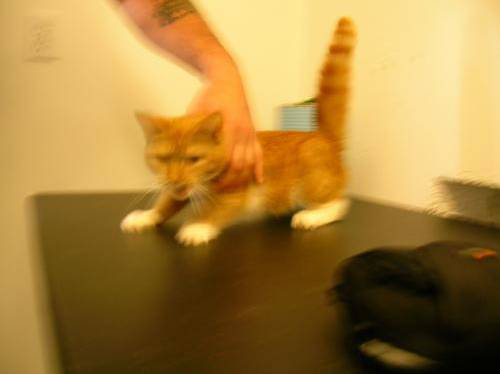

In [60]:
# Now see Augmented images visually
Image.open("train_1/cat/cat.0.jpg")

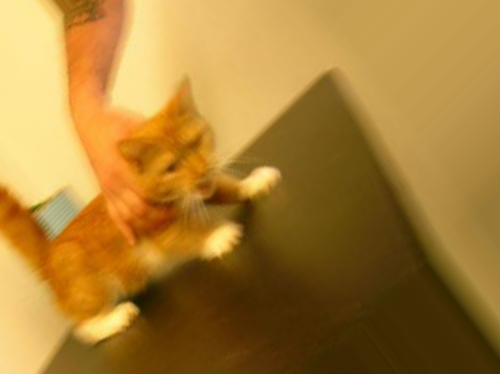

In [62]:
# See augmente
Image.open("sample_image/_0_1050.png")

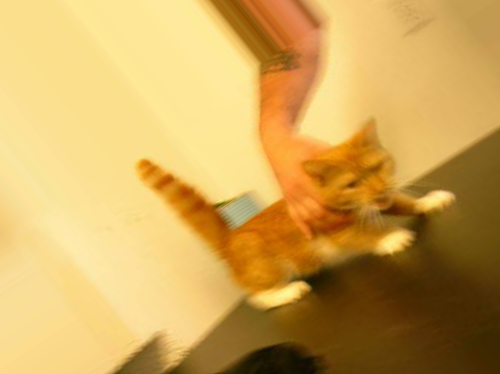

In [64]:
# See other augmented images
Image.open("sample_image/_0_1743.png")

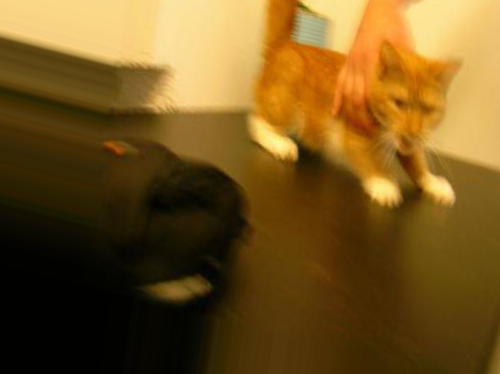

In [65]:
# See other augmented images
Image.open("sample_image/_0_1388.png")

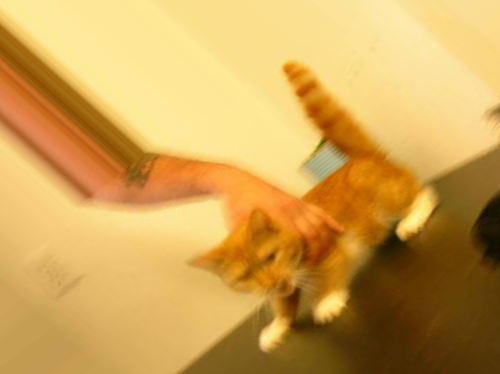

In [66]:
# See other augmented images
Image.open("sample_image/_0_1421.png")

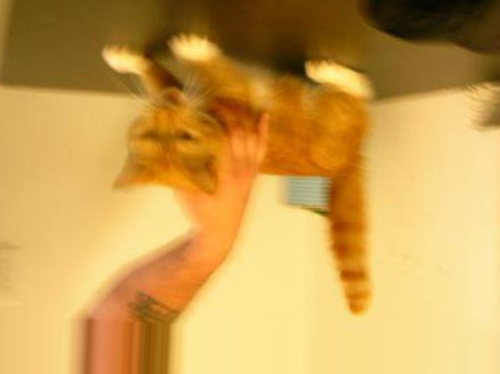

In [68]:
# See other augmented images
Image.open("sample_image/_0_4762.png")  # See -- images are flipped vertically.

**Note:**

---

**No. of Images are not increases.[remains 25000]**

**Only what happens --- at each epoches previously same images are used as input with random shuffling.....but...now...at each epoches not only shuffling is done but also the images are augmented at first...then... augmented images are send to inputs -----for different epoches.**


---



We are just introducing a little-bit randomness in the images only. Nothing more than that.

---



In [69]:
#IDG

# idg = ImageDataGenerator(rotation_range=45, width_shift_range=0.2, height_shift_range=0.2,
#                          shear_range=0.2, zoom_range=0.2, horizontal_flip=True,
#                          vertical_flip=True, rescale=1/255.0, validation_split=0.2)

In [71]:
# make train_generator

train_generator = idg.flow_from_directory(directory="train_1", target_size=(150,150), batch_size=128, subset="training")

Found 20000 images belonging to 2 classes.


In [73]:
val_generator = idg.flow_from_directory(directory="train_1", target_size=(150,150), batch_size=128, subset="validation")

Found 5000 images belonging to 2 classes.


In [74]:
# Import Necessary Packages/Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD

In [79]:
# Now Bulid a NN Sequential Model
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(256, activation=relu))
model.add(Dense(64, activation=relu))
model.add(Dense(2, activation=softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               17280256  
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 17,296,834
Trainable params: 17,296,834
Non-trainable params: 0
_________________________________________________________________


In [80]:
from tensorflow.python import metrics
# Now Compile model--- set optimizers, performance metrics
model.compile(optimizer=SGD(learning_rate=0.01), loss=categorical_crossentropy,
              metrics='acc')

In [81]:
model_history = model.fit_generator(generator=train_generator, #batch_size=128, 
          epochs=25, validation_data= val_generator,  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
157/157 [==============================] - 169s 1s/step - loss: 0.7669 - acc: 0.5213 - val_loss: 0.6865 - val_acc: 0.5402
Epoch 2/25
157/157 [==============================] - 165s 1s/step - loss: 0.6851 - acc: 0.5520 - val_loss: 0.6828 - val_acc: 0.5624
Epoch 3/25
157/157 [==============================] - 165s 1s/step - loss: 0.6794 - acc: 0.5684 - val_loss: 0.6797 - val_acc: 0.5718
Epoch 4/25
157/157 [==============================] - 167s 1s/step - loss: 0.6779 - acc: 0.5757 - val_loss: 0.6775 - val_acc: 0.5646
Epoch 5/25
157/157 [==============================] - 167s 1s/step - loss: 0.6763 - acc: 0.5753 - val_loss: 0.6764 - val_acc: 0.5764
Epoch 6/25
157/157 [==============================] - 165s 1s/step - loss: 0.6747 - acc: 0.5796 - val_loss: 0.6695 - val_acc: 0.5886
Epoch 7/25
157/157 [==============================] - 164s 1s/step - loss: 0.6739 - acc: 0.5803 - val_loss: 0.6708 - val_acc: 0.5776
Epoch 8/25
157/157 [==============================] - 165s 1s/step - 

In [82]:
#Prediction for val_generator dataset
y_pred = model.predict_generator(val_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [83]:
type(y_pred)

numpy.ndarray

In [84]:
y_pred.shape # 5000 validation_image and each has 2 values--1 for cat and 2nd for dog.

(5000, 2)

In [85]:
y_pred[:5] #see the results for 1st 5 images

array([[0.41255   , 0.58744997],
       [0.4902451 , 0.5097549 ],
       [0.44184327, 0.5581567 ],
       [0.45525035, 0.5447496 ],
       [0.7331609 , 0.26683906]], dtype=float32)

In [86]:
type(val_generator)

keras.preprocessing.image.DirectoryIterator

In [88]:
#help(val_generator)

In [89]:
# Judge--which model is better--model_1 or model_2

#model:1 - Dog = 90% and Cat=10% - yes - this is the correct model, better confidence.
#model:2 - Dog = 60% and Cat=40% 

In [90]:
# take random images from train folder and send to model.predict. 
# identify wrongly classified images - how to do this??

In [91]:
# Define on efunction to do all the processes at one place.
def get_image(image_path):
  img_1 = load_img(image_path)
  img_1 = img_to_array(img_1)
  img_1 = cv2.resize(img_1, (150,150))
  img_1 = np.expand_dims(img_1, axis=0)
  return img_1

In [92]:
# Now, consider any test image.
test_image = get_image("train/cat.1.jpg")

In [93]:
# Now predict this iamge
model.predict(test_image)  # This predict that image is "Cat"

array([[1.0000000e+00, 6.5976205e-34]], dtype=float32)

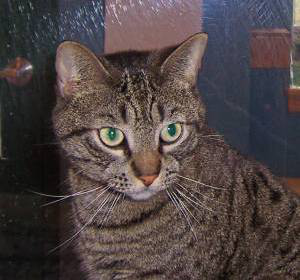

In [94]:
# Let's see that image
Image.open("train/cat.1.jpg")

In [96]:
# Let's predict one image from Dog folder
test_image = get_image("train/dog.2.jpg")

In [98]:
#predict
model.predict(test_image) # This predict that image is "dog"

array([[3.3058644e-22, 1.0000000e+00]], dtype=float32)

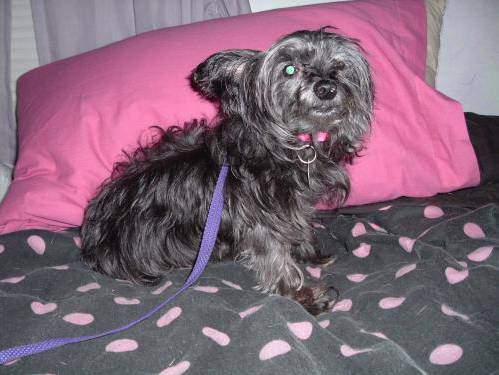

In [99]:
#Let's see this image
Image.open("train/dog.0.jpg")    # Yes, this is a dog.

In [100]:
# Check the accurcay of the trained Model

In [101]:
model_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

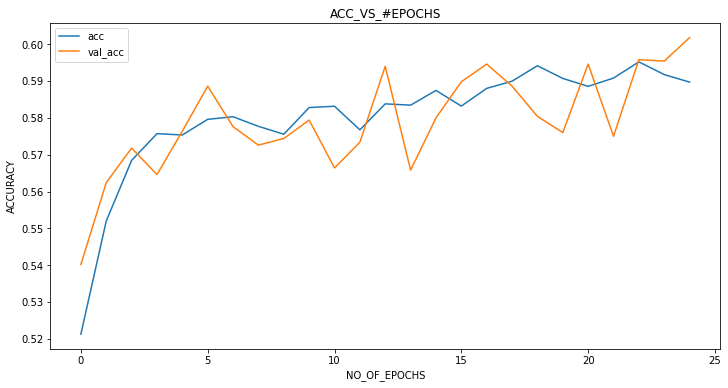

In [104]:
# plot
plt.figure(figsize=(12,6))
plt.plot(model_history.history.get("acc"), label = "acc")
plt.plot(model_history.history.get("val_acc"), label = "val_acc")
plt.legend()
plt.ylabel("ACCURACY")
plt.xlabel("NO_OF_EPOCHS")
plt.title("ACC_VS_#EPOCHS")
plt.show()

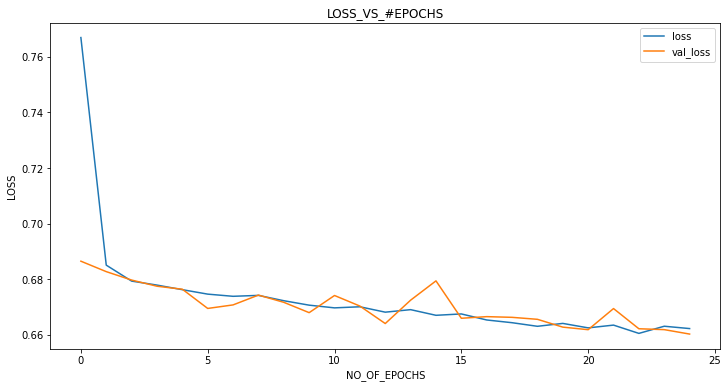

In [105]:
# plot--loss
plt.figure(figsize=(12,6))
plt.plot(model_history.history.get("loss"), label = "loss")
plt.plot(model_history.history.get("val_loss"), label = "val_loss")
plt.legend()
plt.ylabel("LOSS")
plt.xlabel("NO_OF_EPOCHS")
plt.title("LOSS_VS_#EPOCHS")
plt.show()

In [107]:
type(model_history.history["val_acc"])

list

In [109]:
len(model_history.history["val_acc"])  # as the number of epochs

25

In [110]:
max(model_history.history["val_acc"])  # MAximum Validation Accuracy

0.6018000245094299

In [111]:
min(model_history.history["val_acc"])   # Minimum Validation Accuracy

0.5401999950408936

Now, 

We can count the total number of wrongly classified images.

OR

Just Analyze the prediction Accuracy for Test Image

In [112]:
# Unzip test image
!unzip -q test1.zip

In [114]:
len(os.listdir("test1"))

12500

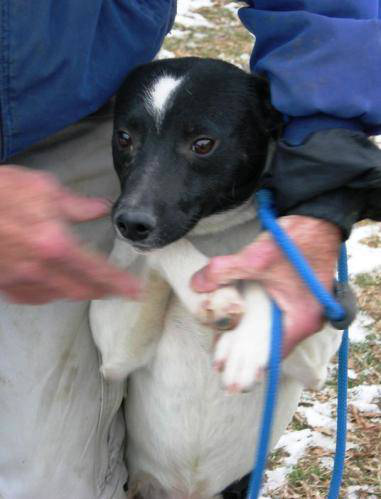

In [115]:
#See any particulat image
Image.open("test1/1.jpg")

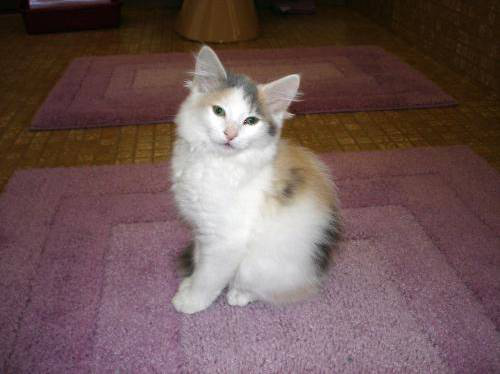

In [117]:
#See any particulat image
Image.open("test1/10.jpg")

In [121]:
# Predict this cat image
model.predict(get_image("test1/10.jpg")) # This is accurcately predicted as cat

array([[1., 0.]], dtype=float32)

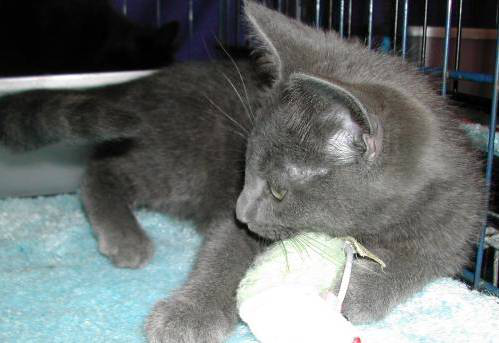

In [118]:
#See another image
Image.open("test1/100.jpg")

In [119]:
# Since the labels of test_images are not given. So, It is impossible to find the accuracy of the model on given test-dataset.

In [122]:
# Predict all the test1_images
test_pred = []
for test_image_path in os.listdir("test1/"):
  pred = model.predict(get_image("test1/"+test_image_path))
  test_pred.append(pred)

In [123]:
type(test_pred)

list

In [124]:
len(test_pred)

12500

In [125]:
test_pred = np.array(test_pred)

In [126]:
# Shape of total test image -- prediction
test_pred.shape

(12500, 1, 2)

In [127]:
# Print predictions of few test images
test_pred[:15] # Print prediction of 15 images

array([[[1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 1.2302744e-30]],

       [[1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00]],

       [[1.2229067e-04, 9.9987769e-01]],

       [[1.0000000e+00, 1.2530561e-16]],

       [[1.0000000e+00, 4.9888873e-36]],

       [[1.3711076e-18, 1.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00]]], dtype=float32)

In [134]:
#Now,

**Save the Model**

In [135]:
model.save(filepath="Cat_vs_Dog_Image_Augmentation")

In [120]:
#END